<center><h1> Capstone: </h1><center>
    <br>
<br>
    
Daniela Martinez<br>
Data Science Student, Brainstation, 2024<br>
_______________________________________________________________________________
<h3> Wine Classification Prediction</h1>

### Table of Content
Part 0. <a href="#part-0">Overviewing and Cleaning Data</a> <br>
Part 1. <a href="#part-1">Exploratory Data Analysis</a> <br>
Part 2. <a href="#part-2">Statistical Analysis</a> <br>
Part 3. <a href="#part-3">Advanced Statistical Analysis</a> <br>

### Part 0 - Overviewing Data and Cleaning Data<a class="anchor" id="part-0"></a>

___

#### 1. Overviewing Data

#### Dataset
For this prediction two datasets are going to be used for these predictions, both are for public access.

One of them contains attributes related to Pesticides and Yield. This dataset was collected from [FAOSTAT](https://www.fao.org/faostat/en/#data/QCL)
The second dataset contains information related to Rainfall and Avg. Temperature. It was collected from the [World Data Bank](https://data.worldbank.org/indicator)





#### Data dictionary

Area: Country names that plant raw_yields<br>
Item: Types of crops planted<br>
Year: Time of planted crops in years 1990-2013<br>
average_rain_fall_mm_per_year: Average rain fall per year<br>
pesticides_tonnes: Pesticides used in tonnes per ha<br>
avg_temp: Average temperature (celsius)<br>
hg/ha_yield: Crops yield production value in hectogram per hectare (hg/Ha)

**Importing Packages**

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#### 2. Loading data frames and Cleaning process

- 2.1 Loading dataset

In [22]:
# Importing the dataset
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
features = wine.data.features
target = wine.data.targets
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

- 2.2 Exploring datasets

In [23]:
features.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
# basic EDA summary for target df
print(f"Total rows: {target.shape[0]}")
print(f"Total columns: {target.shape[1]}")
print(f"Null values: {target.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {target.T.duplicated()}")

Total rows: 178
Total columns: 1
Null values: 0
----------
Duplicate columns: class    False
dtype: bool


In [49]:
# basic EDA summary for features df
print(f"Total rows: {features.shape[0]}")
print(f"Total columns: {features.shape[1]}")
print(f"Null values: {features.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {features.T.duplicated()}")

Total rows: 178
Total columns: 13
Null values: 0
Duplicate columns: Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool


- Generating original dataset for visualizations

In [27]:
# Concatenating datasets
wine = pd.concat([target, features], axis=1)

# Saving the merged dataset to a new CSV file
wine.to_csv('data/wine.csv', index=False)

In [28]:
wine = pd.read_csv('data/wine.csv')

In [29]:
wine.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
wine.sample(10)

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
38,1,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.19,2.30,678
153,3,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
92,2,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495
82,2,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630
56,1,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
85,2,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450
146,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740


In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [51]:
# basic EDA summary for wine df
print(f"Total rows: {wine.shape[0]}")
print(f"Total columns: {wine.shape[1]}")
print(f"Null values: {wine.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {wine.T.duplicated()}")

Total rows: 178
Total columns: 14
Null values: 0
----------
Duplicate columns: class                           False
Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool


- Duplicated entries

In [32]:
# Finding duplicated entries
duplicates = wine[wine.duplicated(keep=False)]

# Show duplicated entries
print("Original and Duplicate Entries:")
print(duplicates)

Original and Duplicate Entries:
Empty DataFrame
Columns: [class, Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline]
Index: []


In [33]:
# Count the total number of duplicated rows
total_duplicates = wine.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = wine.shape[0]

# Calculate the percentage of duplicate entries
percentage_duplicates = (total_duplicates / total_rows) * 100

# Print the percentage of duplicate entries
print("Percentage of duplicate entries:", percentage_duplicates)

Percentage of duplicate entries: 0.0


This is a clean dataset. There are not dupicated entries, neither duplicated columns or Null values.

### Part 1 - Exploratory Data Analysis<a class="anchor" id="part-a"></a>

___

- Distribution of the dataset

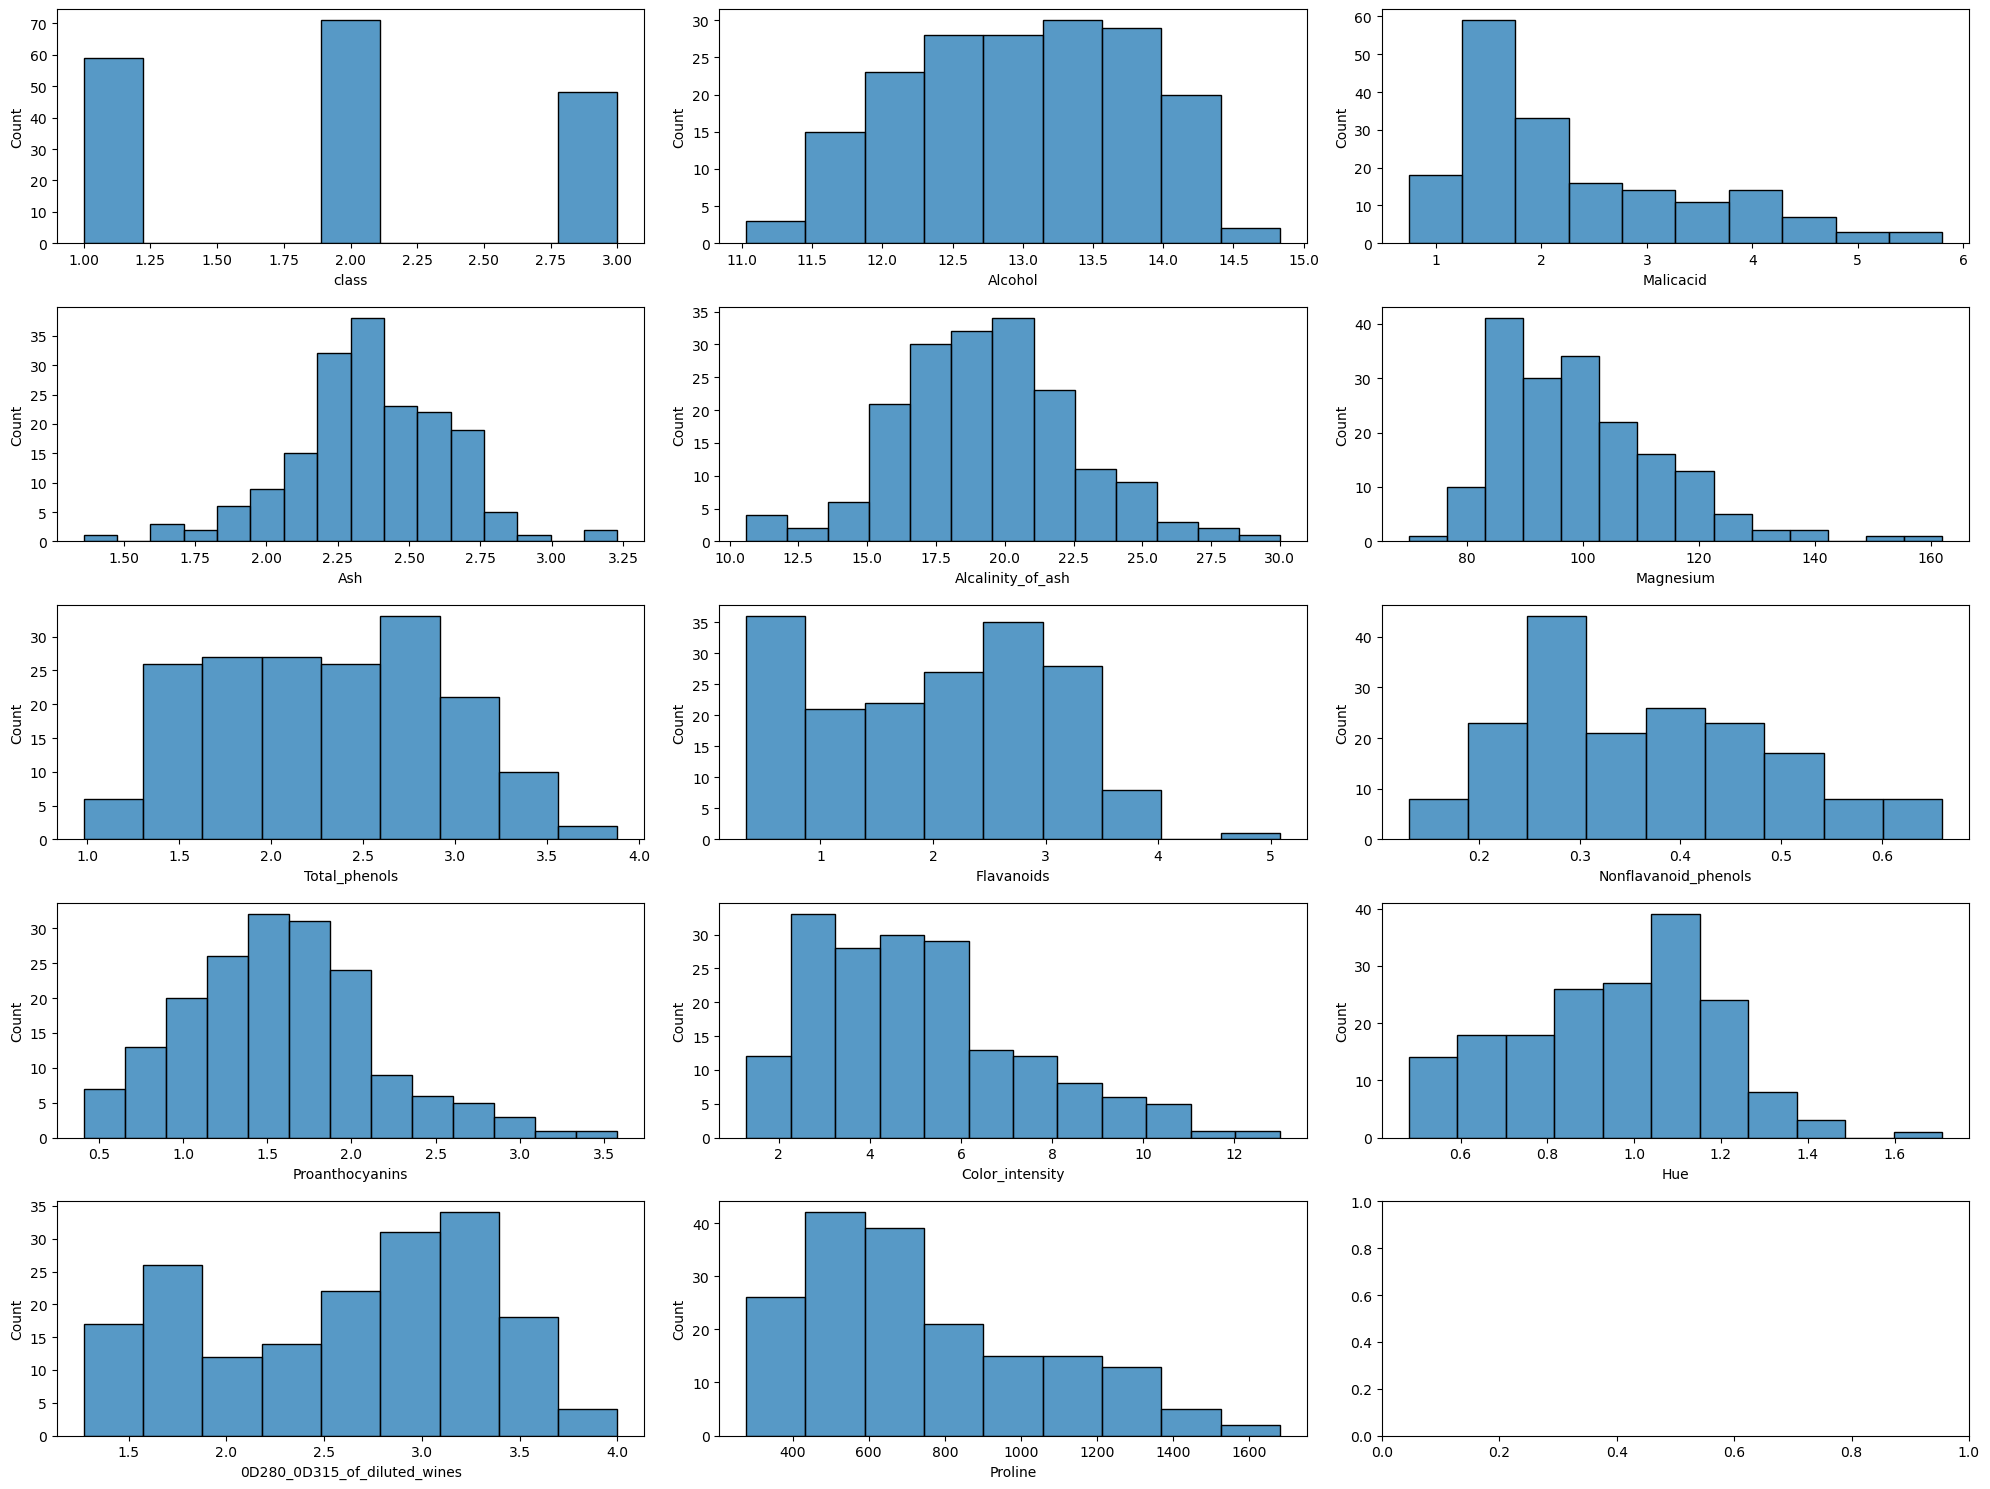

In [38]:
# Visualize distribution of unscaled data in each feature
col_names = wine.columns
plot_num = 1

plt.subplots(5,3, figsize=(20,15))

for col in wine:
    plt.subplot(5,3,plot_num)
    sns.histplot(wine[col])
    plot_num +=1

plt.tight_layout()
plt.show()

Most of the distribution of the data seems to be normalized. The graph also shows only 3 class of wine.

In [56]:
columns_plot = wine.columns

C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\ipykernel_17188\2975347235.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Windows\Temp\

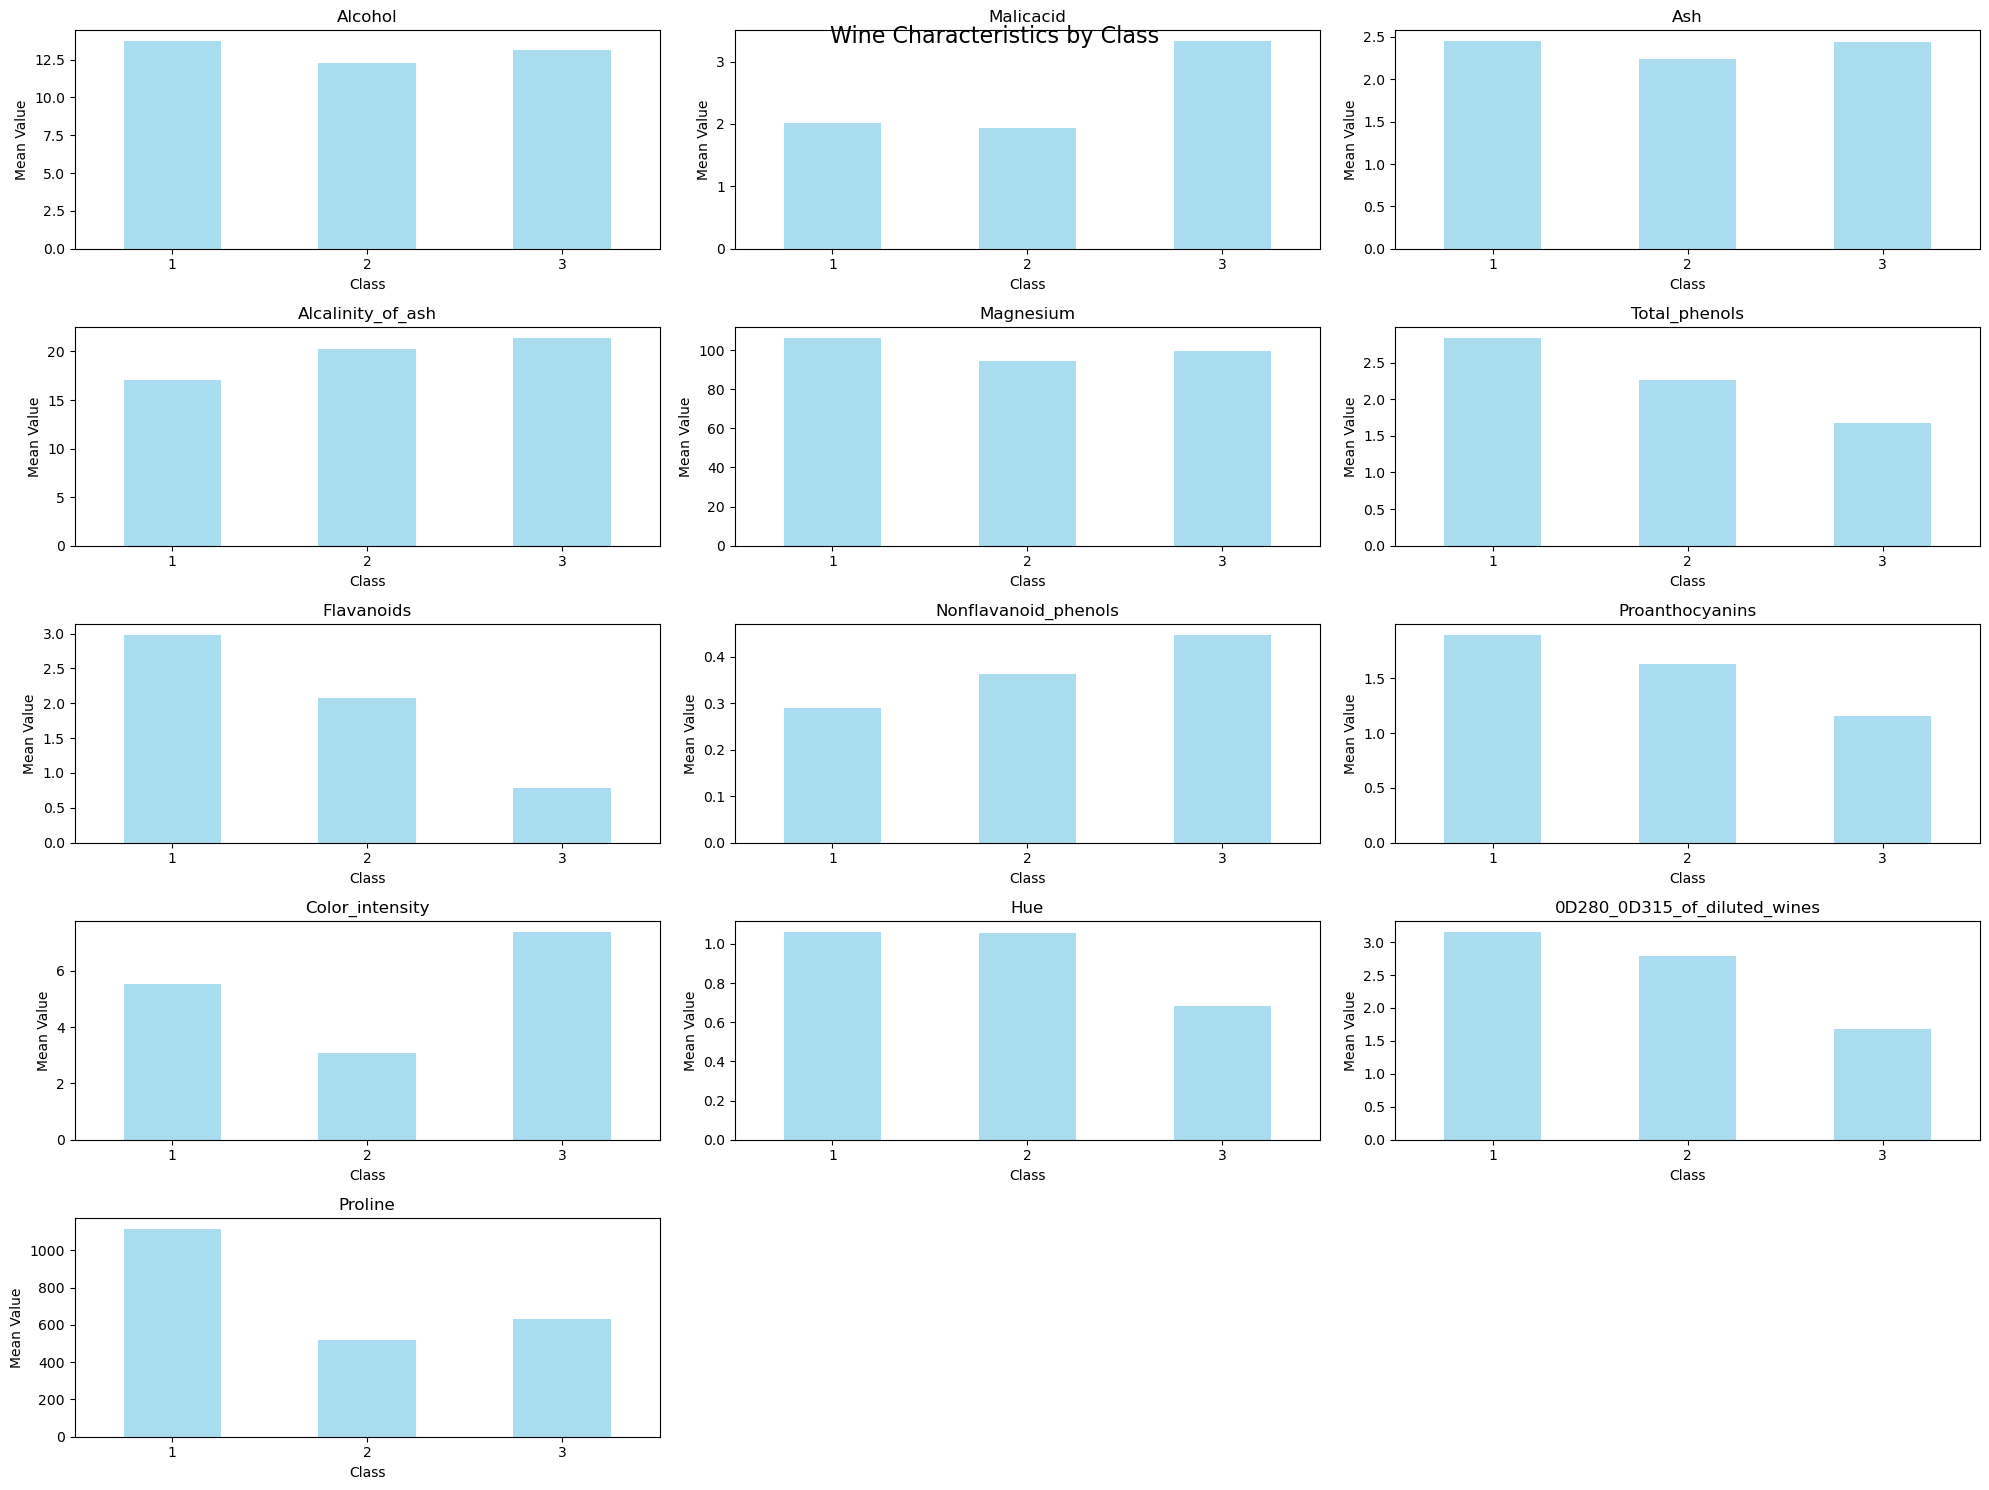

In [60]:

# Define the columns to plot (exclude 'class')
columns_to_plot = list(wine.columns)
columns_to_plot.remove('class')

# Plotting
plt.figure(figsize=(20,15))

# Loop through each column and create a grouped bar plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(5, 3, i+1)  # Adjust the subplot layout as needed
    wine.groupby('class')[col].mean().plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.suptitle('Wine Characteristics by Class', fontsize=16)
plt.show()

# Analyze this above